In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('ecommerce_data.csv')
df.head(20)

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2
5,1,1,0.512447,1,1,2
6,0,0,1.440327,1,1,0
7,1,0,0.035260,0,3,0
8,0,1,1.490764,0,0,1
9,0,0,0.005838,1,3,0


In [3]:
df = pd.read_csv('ecommerce_data.csv')
data = df.as_matrix()

In [4]:
X = data[:,:-1]
Y = data[:,-1]

X[:20]

array([[ 1.        ,  0.        ,  0.65750995,  0.        ,  3.        ],
       [ 1.        ,  1.        ,  0.56857123,  0.        ,  2.        ],
       [ 1.        ,  0.        ,  0.042246  ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.65979338,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  2.01474485,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.51244739,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  1.4403271 ,  1.        ,  1.        ],
       [ 1.        ,  0.        ,  0.03526023,  0.        ,  3.        ],
       [ 0.        ,  1.        ,  1.49076409,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00583752,  1.        ,  3.        ],
       [ 0.        ,  4.        ,  2.04604049,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.95588947,  0.        ,  3.        ],
       [ 1.        ,  0.        ,  0.1593776 ,  0.        ,  0.        ],
       [ 1.        ,  2.        ,  0.7

In [5]:
#normalizing columns 1 and 2
#Z = (X - mu)/std

X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

X[:20]

array([[ 1.        , -0.81697841, -0.40827769,  0.        ,  3.        ],
       [ 1.        ,  0.13967078, -0.4994283 ,  0.        ,  2.        ],
       [ 1.        , -0.81697841, -1.03884323,  1.        ,  1.        ],
       [ 1.        ,  0.13967078,  0.6189325 ,  1.        ,  1.        ],
       [ 0.        ,  0.13967078,  0.9827116 ,  1.        ,  1.        ],
       [ 1.        ,  0.13967078, -0.55694795,  1.        ,  1.        ],
       [ 0.        , -0.81697841,  0.3940081 ,  1.        ,  1.        ],
       [ 1.        , -0.81697841, -1.04600273,  0.        ,  3.        ],
       [ 0.        ,  0.13967078,  0.44569946,  0.        ,  0.        ],
       [ 0.        , -0.81697841, -1.07615718,  1.        ,  3.        ],
       [ 0.        ,  3.00961835,  1.01478556,  1.        ,  0.        ],
       [ 0.        , -0.81697841, -0.10247748,  0.        ,  3.        ],
       [ 1.        , -0.81697841, -0.91879856,  0.        ,  0.        ],
       [ 1.        ,  1.09631997, -0.2

In [6]:
#creating one hot encoding for the column 4
N, D = X.shape
X2 = np.zeros((N, D+3))
X2[:,0:(D-1)] = X[:,0:(D-1)]
for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1

In [7]:
#another way of doing this
Z = np.zeros((N,4))
Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
X2[:,-4:] = Z

assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)

Z

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]])

In [8]:
def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:,:-1]
    Y = data[:,-1]
    
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
    
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1
        
#     Z = np.zeros((N,4))
#     Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
#     X2[:,-4:] = Z
    
#     assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    
    return X2, Y

def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [9]:
#Binary classification as logistic just do binary
X, Y = get_binary_data()

D = X.shape[1]
W = np.random.randn(D)
b = 0

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

P_Y_given_X = forward(X, W, b) #This returns probabilities of Y given X
predictions = np.round(P_Y_given_X) #Round to make the prediction

def classification_rate(Y, P):
    return np.mean(Y == P)

print("Score:", classification_rate(Y, predictions))

Score: 0.741206030151


There's no training until now

## Using Gradient Descent ##

In [18]:
from sklearn.utils import shuffle

X, Y = get_binary_data()
X, Y = shuffle(X, Y)

Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

D = X.shape[1]
W = np.random.randn(D)
b = 0

0 1.82300670649 1.79924471796
1000 0.195180590304 0.155739650574
2000 0.193863834281 0.154067967987
3000 0.193780205434 0.153855536769
4000 0.193773573037 0.153809909158
5000 0.193773017181 0.153797865923
6000 0.193772969868 0.153794451131
7000 0.193772965823 0.153793461052
8000 0.193772965477 0.153793172078
9000 0.193772965447 0.153793087572
10000 0.193772965445 0.153793062845
11000 0.193772965445 0.153793055608
12000 0.193772965445 0.153793053491
13000 0.193772965445 0.153793052871
14000 0.193772965445 0.153793052689
15000 0.193772965445 0.153793052636
16000 0.193772965445 0.153793052621
17000 0.193772965445 0.153793052616
18000 0.193772965445 0.153793052615
19000 0.193772965445 0.153793052615
20000 0.193772965445 0.153793052614
21000 0.193772965445 0.153793052614
22000 0.193772965445 0.153793052614
23000 0.193772965445 0.153793052614
24000 0.193772965445 0.153793052614
25000 0.193772965445 0.153793052614
26000 0.193772965445 0.153793052614
27000 0.193772965445 0.153793052614
28000 0

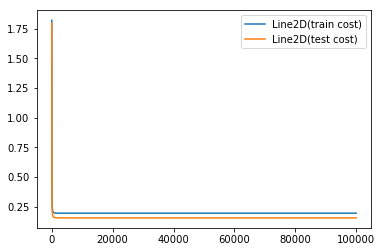

In [20]:
from matplotlib import pyplot as plt

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(100000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()
    if i % 1000 ==0:
        print(i, ctrain, ctest)
        
print("Final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))
      
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()